In [42]:
import numpy as np
from scipy.optimize import minimize

from model_network import *


import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})

USE_TEX = False
if USE_TEX:
    plt.rc("text", usetex=True)
    plt.rc("text.latex", preamble=r"""
     \usepackage{times}
     \usepackage{mathptmx}""")
else:
    plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [5]:
# gain utility function
def utility_gain(x, gamma_gain):
    return 1-np.exp(-gamma_gain*x)


# loss utility function
def utility_loss(x, gamma_loss):
    return -1 + np.exp(gamma_loss*x)

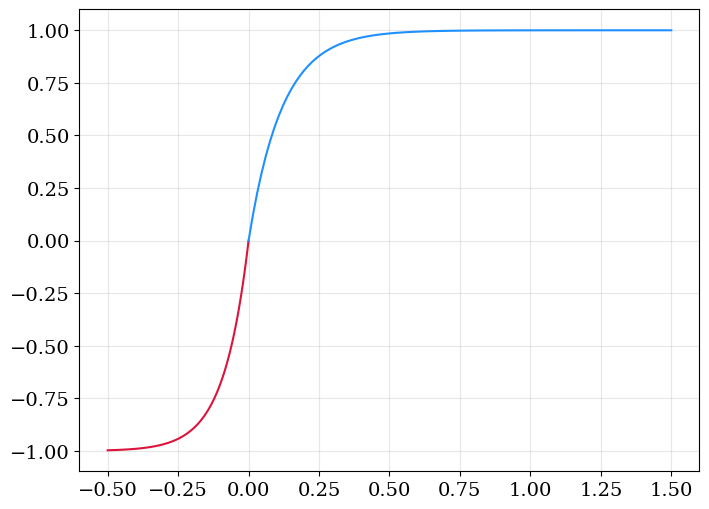

In [220]:
gamma_gain = 8.4
gamma_loss = 11.4

plt.plot(np.linspace(-0.5,0,100), 
         utility_loss(np.linspace(-0.5,0,100), gamma_loss), color="crimson")
plt.plot(np.linspace(0,1.5,100), 
         utility_gain(np.linspace(0,1.5,100), gamma_gain), color="dodgerblue")
plt.show()

In [285]:
from cptopt.optimizer import MeanVarianceFrontierOptimizer, ConvexConcaveOptimizer
from cptopt.utility import CPTUtility

In [255]:
gambles = generate_gambles(N=5)
gambles.append({"outcomes":[1.1,0.0], "probs":[1,0]})
gambles

[{'outcomes': [0.9048483655589421, 2.4152820919869513],
  'probs': [0.38068510412957146, 0.6193148958704285]},
 {'outcomes': [0.9018288753286734, 2.438354893519045],
  'probs': [0.7948762327230419, 0.20512376727695814]},
 {'outcomes': [0.9036178573549135, 2.2280333284518963],
  'probs': [0.2392405761340814, 0.7607594238659185]},
 {'outcomes': [0.9132357372970978, 2.1453993010185686],
  'probs': [0.6887569258362805, 0.31124307416371955]},
 {'outcomes': [0.9302551115738107, 2.048151407468716],
  'probs': [0.675273906259959, 0.324726093740041]},
 {'outcomes': [1.1, 0.0], 'probs': [1, 0]}]

In [256]:
samples = 20000
gamble_returns = np.zeros((samples,len(gambles)))
for i,g in enumerate(gambles):
    gamble_returns[:,i] = np.random.choice(g["outcomes"], samples, p=g["probs"]) - 1

In [269]:
utility = CPTUtility(
    gamma_pos=8.4, gamma_neg=11.4,
    delta_pos=.77, delta_neg=.79
)

mv = MeanVarianceFrontierOptimizer(utility)
mv.optimize(gamble_returns, samples=100)
mv.weights.round(3)

array([0.129, 0.029, 0.239, 0.059, 0.066, 0.478])

In [284]:
cc = ConvexConcaveOptimizer(utility, max_iter=2)
cc.optimize(gamble_returns, initial_weights=np.repeat(1/6, 6))
cc.weights

array([0.15711679, 0.01109324, 0.22429458, 0.05371205, 0.05796143,
       0.4958219 ])